In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [133]:
df = pd.read_csv("XYZ_Admission.csv")

**Background/Problem statement** : 

- **Primary Goal** 
 - Recognizing **significant features** that will **identify the factors are important in graduate admissions**
 - Recognizing **factors are interrelated among themselves**
 - Predict one's **chances of admission in into the IVY league college** for given significant factors
         
- **Statistical summary**
 - More **likelihood of admission**
 - Analysis of Strength vs Areas of Improvements
 - Recommending target score for admission

- **Long term benefits** : Revenue , Student acquisition 

### Basic Analysis

- **Analysing metrics** - Basic metrics
 - Observations on **shape** of data
 - **Data types** of all the attributes
 - **Conversion** of categorical attributes to 'category' (If required)
 - **Structure & characteristics** of the dataset
 - Statistical summary

In [134]:
df.shape

(500, 9)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [136]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


- **Conclusion** 
 - Not a very small size sample
 - Serial No is unique row Identifier , can be dropped . 
     - This step is important as we don’t want our model to build some understanding based on row numbers.

### Droping Unique Indentifier feature - Serial No

In [137]:
df.drop(["Serial No."], axis=1, inplace=True)

In [138]:
display(df.describe())

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- **Observations** 
 - GRE score ranges from 290(min) to 340 (max)
 - Data points are nearly balalnced wrt. feature "Research"

### Distribution

<AxesSubplot:>

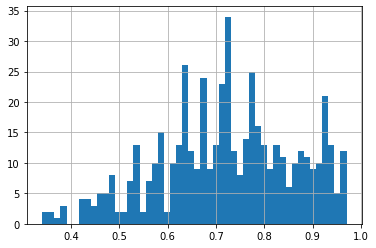

In [139]:
df['Chance of Admit '].hist(bins=50)

Another useful plot is called the 'density' plot. Which is also similar to histogram, but with a more approximate shape. It tries to fit a suitable distribution over the histogram and hence includes points that might not even be present in data at hand.

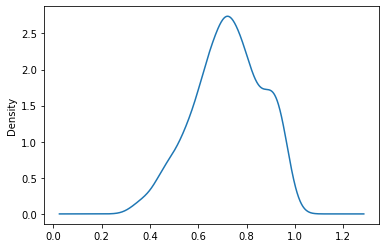

In [140]:
df["Chance of Admit "].plot.density();

## Data Preprocessing - Part 1

### Duplicate value check

In [141]:
duplicate = df[df.duplicated()]
duplicate

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


**Observation** - **No duplicate values present** 

### Missing Value Detection

In [142]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
GRE Score,GRE Score,0.0
TOEFL Score,TOEFL Score,0.0
University Rating,University Rating,0.0
SOP,SOP,0.0
LOR,LOR,0.0
CGPA,CGPA,0.0
Research,Research,0.0
Chance of Admit,Chance of Admit,0.0


- **Insights** : 
 - Zero missing values , good quality data
 - No missing value treatment required 

### Outlier Detection &  Treatment Consideration

- **Checking Outliers using Visual plots**

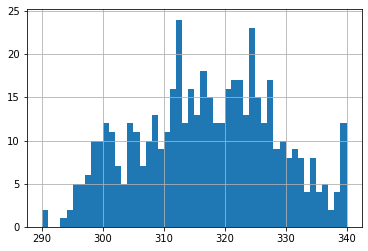

In [143]:
df["GRE Score"].hist(bins=50);

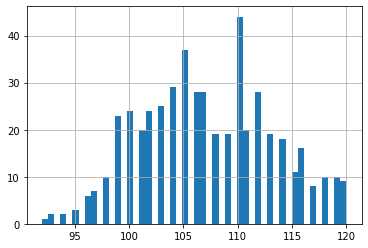

In [144]:
df["TOEFL Score"].hist(bins=50);

- **Lets check the percntage of outliers**

In [145]:
(df.loc[df["Chance of Admit "]> 100].shape[0] / df.shape[0]) * 100

0.0

- **Checking Outliers using statistical methods**

In [146]:
column_name = "Chance of Admit " 

Q1=df[column_name].quantile(0.25)
Q3=df[column_name].quantile(0.75)

IQR=Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

lower_outliers = df[(df[column_name]<= lower)]
upper_outliers = df[(df[column_name]>= upper)]

In [147]:
lower_outliers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


In [148]:
upper_outliers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [149]:
df.drop(lower_outliers.index,inplace = True)

In [150]:
lower_outliers = df[(df[column_name]<= lower)]

- **Conclusion** 
 - **Outliers impacts mean based statistical methods**
 - **Going ahead with outlier removal** 
 - Post outlier removal on dependent feature "Chance of Admit" , there are no more outliers 
  - Moreover, few deep learning model can work without outliers , hence skipping outlier removal. Hence we're good to proceed with 
    Linear regression model 

### Correlations

Now lets look at the correlations of numerical features with each other

- **Person correlation**
 - Pearson's correlation coefficient, r, is very sensitive to outliers
 - It can have a very large effect on the line of best fit and the Pearson correlation coefficient. 
 - This means — including outliers in your analysis can lead to misleading results.

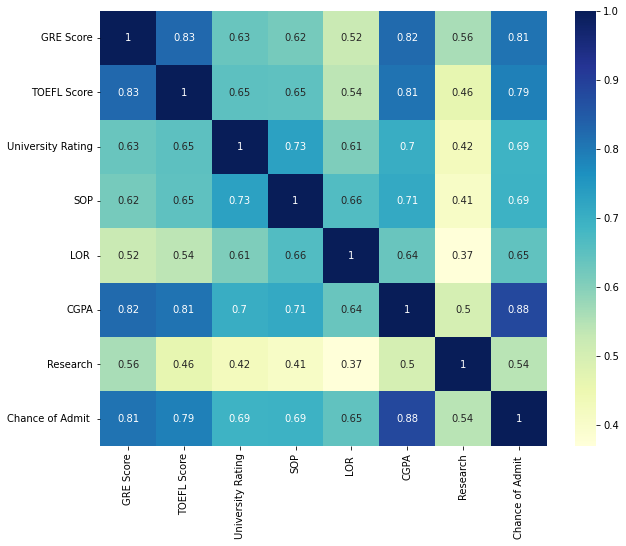

In [151]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(method='pearson'), cmap="YlGnBu", annot=True)

- **Insights** : 
    - High correlation between following variables
        - GRE Score and TOEFL Score (0.83)
        - GRE Score and CGPA (0.82)
        - GRE Score and Chance of Admit (0.81)
        - TOEFL Score and Chance of Admit (0.79)
        - SOP and University Rating (0.73)
        - SOP and CGPA (0.71)
        - CGPA and University Rating (0.7)
        - LOR and SOP (0.66)
        - LOR and CGPA(0.64)
        
    - Chance of Admit has high correlation between following variables 
        - CGPA
        - GRE SCore
        - TOEFL score
        - University Rating 
        - SOP 
        - LOR
        - Research

- **Spearman correlation** - Better measure if there are multiple outliers in each groups. But we're good as there are no outliers

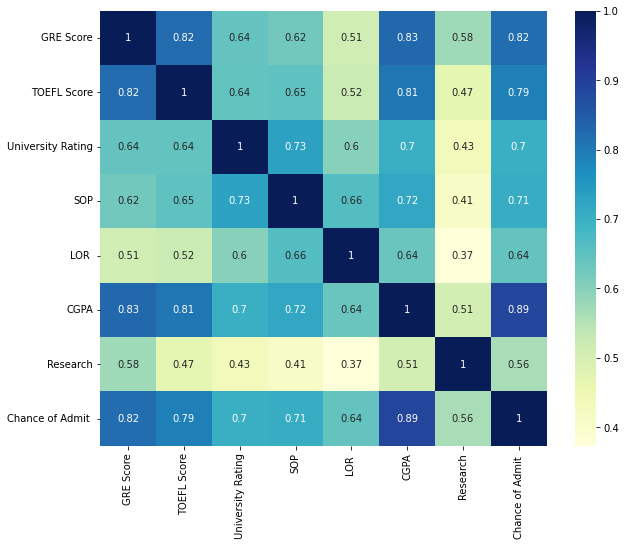

In [152]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(method='spearman'), cmap="YlGnBu", annot=True)

### Non Graphical Analysis

In [153]:
df["University Rating"].value_counts(normalize=True)*100

3    32.530120
2    24.899598
4    21.084337
5    14.658635
1     6.827309
Name: University Rating, dtype: float64

In [154]:
df["SOP"].value_counts(normalize=True)*100

4.0    17.670683
3.5    17.670683
3.0    16.064257
4.5    12.650602
2.5    12.650602
2.0     8.634538
5.0     8.433735
1.5     5.020080
1.0     1.204819
Name: SOP, dtype: float64

In [155]:
df["LOR "].value_counts(normalize=True)*100

3.0    19.678715
4.0    18.875502
3.5    17.269076
4.5    12.650602
2.5    10.040161
5.0    10.040161
2.0     9.036145
1.5     2.208835
1.0     0.200803
Name: LOR , dtype: float64

In [156]:
df["Research"].value_counts(normalize=True)*100

1    56.2249
0    43.7751
Name: Research, dtype: float64

#### Multi-feature Analysis (Marginal Probability)

In [157]:
pd.crosstab(df['Chance of Admit '], df['SOP'], margins=True,normalize=True)*100

SOP,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,All
Chance of Admit,,,,,,,,,,
0.36,0.000000,0.000000,0.200803,0.000000,0.200803,0.000000,0.000000,0.000000,0.000000,0.401606
0.37,0.000000,0.000000,0.200803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200803
0.38,0.000000,0.000000,0.200803,0.000000,0.000000,0.000000,0.000000,0.000000,0.200803,0.401606
0.39,0.000000,0.000000,0.200803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200803
0.42,0.200803,0.200803,0.401606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.803213
...,...,...,...,...,...,...,...,...,...,...
0.94,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200803,1.204819,1.204819,2.610442
0.95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200803,0.803213,1.004016
0.96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.401606,0.000000,1.204819,1.606426


In [158]:
pd.crosstab(df['Chance of Admit '], df['LOR '], margins=True,normalize=True)*100

LOR,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,All
Chance of Admit,,,,,,,,,,
0.36,0.000000,0.000000,0.200803,0.200803,0.000000,0.000000,0.000000,0.000000,0.000000,0.401606
0.37,0.000000,0.200803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200803
0.38,0.000000,0.000000,0.000000,0.200803,0.000000,0.200803,0.000000,0.000000,0.000000,0.401606
0.39,0.000000,0.000000,0.000000,0.200803,0.000000,0.000000,0.000000,0.000000,0.000000,0.200803
0.42,0.200803,0.000000,0.200803,0.200803,0.200803,0.000000,0.000000,0.000000,0.000000,0.803213
...,...,...,...,...,...,...,...,...,...,...
0.94,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.803213,1.807229,2.610442
0.95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.401606,0.401606,0.200803,1.004016
0.96,0.000000,0.000000,0.000000,0.000000,0.000000,0.200803,0.000000,0.401606,1.004016,1.606426


In [159]:
pd.crosstab(df['Chance of Admit '], df['Research'], margins=True,normalize=True)*100

Research,0,1,All
Chance of Admit,,,
0.36,0.200803,0.200803,0.401606
0.37,0.200803,0.000000,0.200803
0.38,0.401606,0.000000,0.401606
0.39,0.200803,0.000000,0.200803
0.42,0.803213,0.000000,0.803213
...,...,...,...
0.94,0.000000,2.610442,2.610442
0.95,0.000000,1.004016,1.004016
0.96,0.000000,1.606426,1.606426


### Visual Analysis 

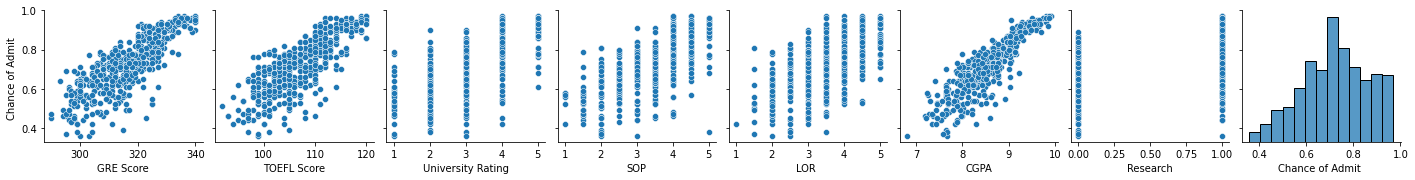

In [160]:
sns.pairplot(df, y_vars=["Chance of Admit "]);

- **Insights** : 
    - **High correlation** between following variables
        - **GRE Score and Chance of Admit**
        - **TOEFL Score and Chance of Admit**
        - **CGPA and Chance of Admit**
    - **Above high correlations** (i.e GRE , TOEFL and CGPA) seem to make a lot of sense , **could contribute as significant features for predicting the Chance of Admit**
    - For **rest features such as "university rating" , "SOP" , "LOR" and "Reasearch"** let's see different group distributions look similar or not . This is **to verify if those groups have any significance in predicting "Chance of Admit"**

### Check distributions across groups (Independent features)

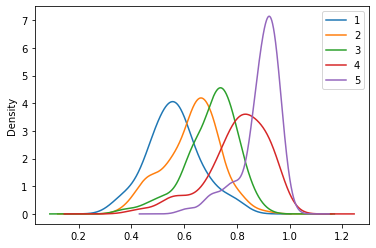

In [161]:
df.groupby('University Rating')['Chance of Admit '].plot.density();
plt.legend();

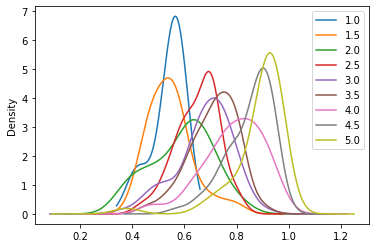

In [162]:
df.groupby('SOP')['Chance of Admit '].plot.density();
plt.legend();

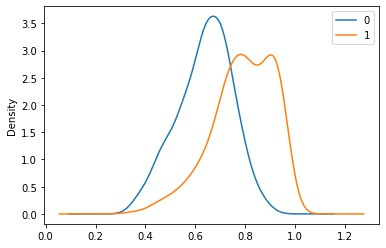

In [163]:
df.groupby('Research')['Chance of Admit '].plot.density();
plt.legend();

- **Insights** : 
    - **Group Distributions are not similar hence there is some significance of each group**
    - **Need to run more statistical methods to affirm level of significance**

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

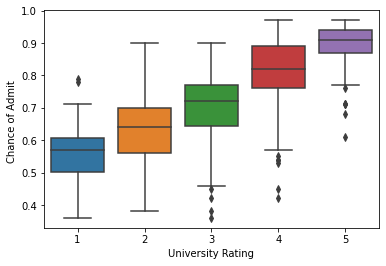

In [164]:
sns.boxplot(x = 'University Rating', y='Chance of Admit ', data=df)

- **Insights** : 
    - **University rating beyond 2 has good chance of Admission**
    - There are outliers as well(i.e. less chance of admission) , may be based on other combination of features

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit '>

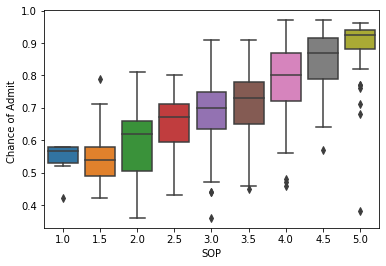

In [165]:
sns.boxplot(x = 'SOP', y='Chance of Admit ', data=df)

- **Insights** : 
    - **SOP score beyond 3 creates a good chance of Admission**
    - There are more outliers(i.e.less chance of admission) when SOP score is too high 

<AxesSubplot:xlabel='LOR ', ylabel='Chance of Admit '>

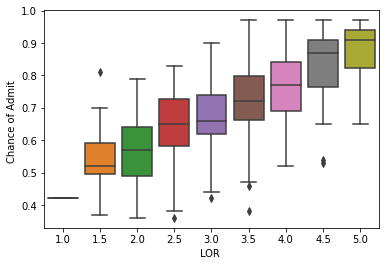

In [166]:
sns.boxplot(x = 'LOR ', y='Chance of Admit ', data=df)

- **Insights** : 
    - **LOR score beyond 3 creates a good chance of Admission**
    - There are outliers(i.e. less chance of admission) when LOR scores are between 2.5 and 4.5

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

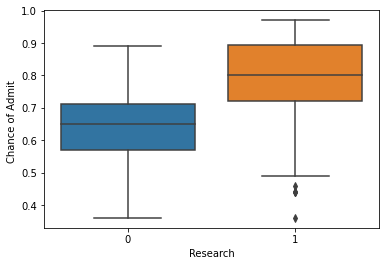

In [167]:
sns.boxplot(x = 'Research', y='Chance of Admit ', data=df)

- **Insights** :
    - More chances of admission if there is research experience

## Data Preprocessing - Part 2

### Feature Engineering


#### Converting GRE score into score categories - Good , Avg , Poor 

In [168]:
def GRE_Score_categorization(x):
    x = int(x)
    if x <= 300:
        return "Poor"
    elif 300 < x < 320:
        return "Average"
    elif x >=320:
        return "Good"

In [169]:
df["GRE_score_category"] = df["GRE Score"].apply(GRE_Score_categorization)

#### Converting TOEFL score into grades 

In [170]:
def TOEFL_Score_categorization(x):
    x = int(x)
    if x < 85:
        return "Poor"
    elif 85 <= x <= 95:
        return "Average"
    elif x > 95:
        return "Good"

In [171]:
df["TOEFL_score_category"] = df["TOEFL Score"].apply(TOEFL_Score_categorization)

#### Converting CGPA into basic categories 

In [172]:
def CGPA_to_basic_categories(x):
    x = int(x)
    if x < 6.5:
        return "Poor"
    elif 6.5 <= x < 7.5:
        return "Average"
    elif x >= 7.5:
        return "Good"

In [173]:
df["CGPA_category"] = df["CGPA"].apply(CGPA_to_basic_categories)

#### GRE / TOEFL ratio - GRE test is considered as much harder than TOEFL (can avoid multi-collinearity )

In [174]:
df["GRE_TOEFL_score_ratio"] = df["GRE Score"] / df["TOEFL Score"]

#### Chance of Admit  category - Just for visualization

In [188]:
def Chance_of_admit_categories(x):
    if x < 0.6:
        return "Less"
    elif x > .6:
        return "High"

In [189]:
df["Chance of Admit_category"] = df["Chance of Admit "].apply(Chance_of_admit_categories)

In [190]:
df["Chance of Admit_category"].value_counts()

High    403
Less     93
Name: Chance of Admit_category, dtype: int64

In [191]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE_score_category,TOEFL_score_category,CGPA_category,GRE_TOEFL_score_ratio,Chance of Admit_category
0,337,118,4,4.5,4.5,9.65,1,0.92,Good,Good,Good,2.855932,High
1,324,107,4,4.0,4.5,8.87,1,0.76,Good,Good,Good,3.028037,High
2,316,104,3,3.0,3.5,8.00,1,0.72,Average,Good,Good,3.038462,High
3,322,110,3,3.5,2.5,8.67,1,0.80,Good,Good,Good,2.927273,High
4,314,103,2,2.0,3.0,8.21,0,0.65,Average,Good,Good,3.048544,High


#### Target Encoding

In [45]:
from category_encoders import TargetEncoder
# Using Target/Response encording for region features as there are more than two levels 
te = TargetEncoder()

In [46]:
df['SOP'] = df['SOP'].astype(str)
df['LOR '] = df['LOR '].astype(str)
df['University Rating'] = df['University Rating'].astype(str)

In [47]:
cols=['SOP','LOR ','University Rating','GRE_score_category','TOEFL_score_category','CGPA_category']
for feature in cols:
    df[feature+'_target_encoded'] = te.fit_transform(df[feature],df['Chance of Admit '])
    df[feature+'_target_encoded']

In [48]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE_score_category,TOEFL_score_category,CGPA_category,GRE_TOEFL_score_ratio,SOP_target_encoded,LOR _target_encoded,University Rating_target_encoded,GRE_score_category_target_encoded,TOEFL_score_category_target_encoded,CGPA_category_target_encoded
0,337,118,4,4.5,4.5,9.65,1,0.92,Good,Good,Good,2.855932,0.850000,0.831905,0.801619,0.838122,0.727,0.759952
1,324,107,4,4.0,4.5,8.87,1,0.76,Good,Good,Good,3.028037,0.787841,0.831905,0.801619,0.838122,0.727,0.759952
2,316,104,3,3.0,3.5,8.00,1,0.72,Average,Good,Good,3.038462,0.678500,0.723023,0.702901,0.658504,0.727,0.759952
3,322,110,3,3.5,2.5,8.67,1,0.80,Good,Good,Good,2.927273,0.712045,0.640600,0.702901,0.838122,0.727,0.759952
4,314,103,2,2.0,3.0,8.21,0,0.65,Average,Good,Good,3.048544,0.589535,0.671837,0.630726,0.658504,0.727,0.759952


<AxesSubplot:xlabel='GRE_score_category', ylabel='count'>

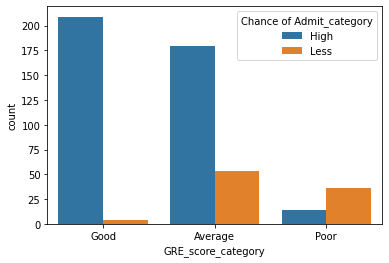

In [192]:
sns.countplot(data=df, x ="GRE_score_category",hue='Chance of Admit_category')

- **Insights**
    - More chance of Admission when GRE score is Good (i.e 320+) or Average (i.e. between 300 and 320)

<AxesSubplot:xlabel='TOEFL_score_category', ylabel='count'>

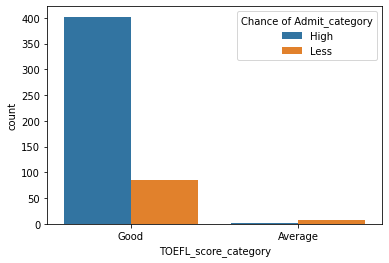

In [193]:
sns.countplot(data=df, x ="TOEFL_score_category",hue='Chance of Admit_category')

- **Insights**
    - More chance of Admission when TOEFL score is Good (i.e 95+)

<AxesSubplot:xlabel='GRE_TOEFL_score_ratio', ylabel='Chance of Admit '>

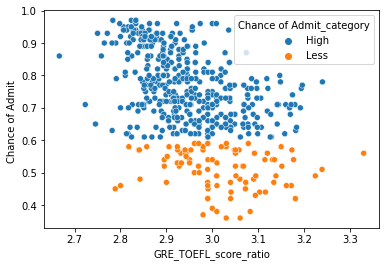

In [194]:
sns.scatterplot(data=df, y ="Chance of Admit ",x='GRE_TOEFL_score_ratio',hue='Chance of Admit_category')

- **Insights**
    - More chance of Admission when GRE to TOEFL score  ratio is more than 0.6

<AxesSubplot:xlabel='CGPA_category', ylabel='count'>

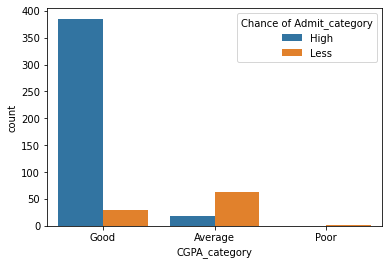

In [195]:
sns.countplot(data=df, x ="CGPA_category",hue='Chance of Admit_category')

- **Insights**
    - More chance of Admission when CGPA category is Good (i.e score more 7.5 +)

### Data preparation for modeling

In [49]:
selected_X = ['GRE Score','TOEFL Score','GRE_TOEFL_score_ratio','CGPA','SOP_target_encoded','LOR _target_encoded','University Rating_target_encoded','GRE_score_category_target_encoded','TOEFL_score_category_target_encoded','CGPA_category_target_encoded','Research']
#selected_X = ['GRE_TOEFL_score_ratio','CGPA','SOP_target_encoded','LOR _target_encoded','University Rating_target_encoded','GRE_score_category_target_encoded','TOEFL_score_category_target_encoded','CGPA_category_target_encoded','Research']
selected_Y = ['Chance of Admit ']

In [50]:
df_X = df[selected_X]
df_Y = df[selected_Y]

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

#### Train Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=1)

In [53]:
X_train.head()

,GRE Score,TOEFL Score,GRE_TOEFL_score_ratio,CGPA,SOP_target_encoded,LOR _target_encoded,University Rating_target_encoded,GRE_score_category_target_encoded,TOEFL_score_category_target_encoded,CGPA_category_target_encoded,Research
438,318,110,2.890909,8.54,0.650159,0.723023,0.562059,0.658504,0.727000,0.759952,1
274,315,100,3.150000,7.95,0.589535,0.640600,0.562059,0.658504,0.727000,0.542073,0
58,300,99,3.030303,6.80,0.678500,0.573333,0.562059,0.540784,0.727000,0.723273,1
380,322,104,3.096154,8.84,0.712045,0.764149,0.702901,0.838122,0.727000,0.759952,1
78,296,95,3.115789,7.54,0.678500,0.573333,0.630726,0.540784,0.495208,0.542073,1


#### Scaling data

In [54]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

## Model building

### Base Model

In [55]:
basic_model = LinearRegression().fit(X_train_transformed, y_train)

### Display model coefficients with column names

In [56]:
print("coefficients",basic_model.coef_)
print(X_train.columns)

coefficients [[ 0.04625695 -0.02631735 -0.02647906  0.0657157   0.00514712  0.01717672
   0.00587455  0.003775   -0.00207737  0.00311097  0.0105253 ]]
Index(['GRE Score', 'TOEFL Score', 'GRE_TOEFL_score_ratio', 'CGPA',
       'SOP_target_encoded', 'LOR _target_encoded',
       'University Rating_target_encoded', 'GRE_score_category_target_encoded',
       'TOEFL_score_category_target_encoded', 'CGPA_category_target_encoded',
       'Research'],
      dtype='object')


In [57]:
print(basic_model.score(X_train_transformed, y_train))
print(basic_model.score(X_test_transformed, y_test))

0.8261299695469154
0.8170808769595135


### Model performance evaluation

In [58]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

y_pred = basic_model.predict(X_test_transformed)

**Metrics checked - MAE, RMSE, R2, Adj R2**

#### MAE

In [59]:
print("MAE: {}".format(mean_absolute_error(y_true=y_test,y_pred=y_pred)))

MAE: 0.04125028687151383


#### RMSE

In [60]:
print("RMSE: {}".format(mean_squared_error(y_true=y_test,y_pred=y_pred, squared=True)))

RMSE: 0.003434277268025449


#### R2 score

In [61]:
print("R2 score: {}".format(r2_score(y_true=y_test,y_pred=y_pred)))

R2 score: 0.8170808769595135


#### ADj R squared

In [62]:
print("Adjusted R square: {}".format(mean_squared_error(y_true=y_test,y_pred=y_pred, squared=True)))

Adjusted R square: 0.003434277268025449


- **Comments on the performance measures and if there is any need to improve the model or not**
    - MSE , RMSE , Adjusted R square values are close to zero for test data 
    - R2 test score is 0.81 , which can try to improve by creating Polynomial feature 

### Model with Polynomial Features

In [63]:
# To keep the model simple degree we're keeping it with 5 and it was observed 
# degree value = 3 the model was showing slight improvement 
degrees = 3 # optimal based on score
train_scores = []
test_scores = []

for degree in range(1, degrees):
    scaler = StandardScaler()
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

In [64]:
train_scores

[0.8261299695469154, 0.854740374556619]

In [65]:
test_scores

[0.8151217211170969, -0.10920575769656549]

- **Comment on the model statistics** : 
    - Polynomial feature didn't show significant improvement in score
    - At higher degree (i.e. 3) test score declined as well
    - At higher degree (i.e. 5) test score declined significantly 
    - Simple Base model is more generalized than regression model with polynomial features
    

### Ridge regression

In [66]:
from sklearn import linear_model
ridge_model = linear_model.Ridge(alpha=.5)
ridge_model.fit(X_train_transformed, y_train)

Ridge(alpha=0.5)

In [67]:
print("coefficients",ridge_model.coef_)
print(X_train.columns)

coefficients [[ 0.02835305  0.00167341 -0.00968033  0.06516247  0.00521152  0.01706535
   0.00602524  0.00402911 -0.00154734  0.00346462  0.0105879 ]]
Index(['GRE Score', 'TOEFL Score', 'GRE_TOEFL_score_ratio', 'CGPA',
       'SOP_target_encoded', 'LOR _target_encoded',
       'University Rating_target_encoded', 'GRE_score_category_target_encoded',
       'TOEFL_score_category_target_encoded', 'CGPA_category_target_encoded',
       'Research'],
      dtype='object')


In [68]:
print(ridge_model.score(X_train_transformed, y_train))
print(ridge_model.score(X_test_transformed, y_test))

0.8260876242385449
0.8173283236034036


#### Tunning Ridge model - Best performance 

In [69]:
lambda_values = np.arange(0.01, 10000, 100)
ridge_train_scores = [] 
ridge_test_scores = []


for lam in lambda_values:
    ridge_model = linear_model.Ridge(alpha=lam)
    ridge_model.fit(X_train_transformed, y_train)
    
    tr_score = ridge_model.score(X_train_transformed, y_train)
    te_score = ridge_model.score(X_test_transformed, y_test)
    
    ridge_train_scores.append(tr_score)
    ridge_test_scores.append(te_score)

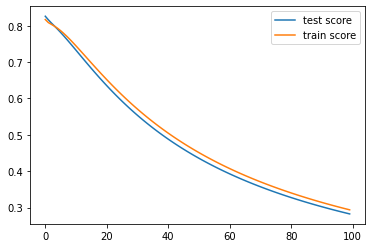

In [70]:
plt.plot(ridge_train_scores, label="test score")
plt.plot(ridge_test_scores, label ="train score")
plt.legend()

In [71]:
print(np.max(ridge_train_scores))
print("Best lambda value (Ridge):",np.argmax(ridge_test_scores))

0.8261298170495287
Best lambda value (Ridge): 0


In [72]:
print(np.max(ridge_test_scores))
print("Best lambda value (Ridge):",np.argmax(ridge_test_scores))

0.817100469300843
Best lambda value (Ridge): 0


### Lasso regression

In [73]:
lasso_model = linear_model.Lasso(alpha=.5)
lasso_model.fit(X_train_transformed, y_train)

Lasso(alpha=0.5)

In [74]:
print("coefficients",lasso_model.coef_)
print(X_train.columns)

coefficients [ 0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.]
Index(['GRE Score', 'TOEFL Score', 'GRE_TOEFL_score_ratio', 'CGPA',
       'SOP_target_encoded', 'LOR _target_encoded',
       'University Rating_target_encoded', 'GRE_score_category_target_encoded',
       'TOEFL_score_category_target_encoded', 'CGPA_category_target_encoded',
       'Research'],
      dtype='object')


In [75]:
print(lasso_model.score(X_train_transformed, y_train))
print(lasso_model.score(X_test_transformed, y_test))

0.0
-0.0003772363685015101


In [76]:
lambda_values = np.arange(0.01, 10000, 100)
lasso_train_scores = [] 
lasso_test_scores = []


for lam in lambda_values:
    lasso_model = linear_model.Lasso(alpha=lam)
    lasso_model.fit(X_train_transformed, y_train)
    
    tr_score = lasso_model.score(X_train_transformed, y_train)
    te_score = lasso_model.score(X_test_transformed, y_test)
    
    lasso_train_scores.append(tr_score)
    lasso_test_scores.append(te_score)

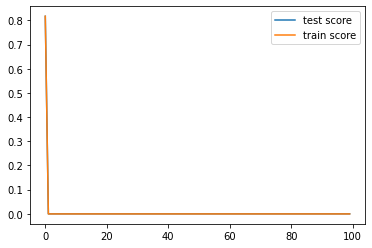

In [77]:
plt.plot(lasso_train_scores, label="test score")
plt.plot(lasso_test_scores, label ="train score")
plt.legend()

In [78]:
print(np.max(lasso_test_scores))
print("Best lambda value (Lasso):",np.argmax(lasso_test_scores))

0.8174319642742843
Best lambda value (Lasso): 0


- **Problem with correlation features**
    - As we've have lot of highly correlated features
    - Lasso (L1) regularization will make one feature as non zero
    - result all other features will become zero.
    - Which is correct in some cases but
    - Can mess up things when you are using weights for feature importance
    - To overcome this dis-advantage we'll use ElasticNet Regularization

### ElasticNet regression


In [79]:
from sklearn.linear_model import ElasticNet

elasticnet_model = linear_model.ElasticNet(alpha=.7)
elasticnet_model.fit(X_train_transformed, y_train)

ElasticNet(alpha=0.7)

#### Tunning ElasticNet model - Best performace 

In [80]:
lambda_values = np.arange(0.01, 10000, 100)
train_scores = [] 
test_scores = []


for lam in lambda_values:
    elasticnet_model = linear_model.ElasticNet(alpha=lam)
    elasticnet_model.fit(X_train_transformed, y_train)
    
    tr_score = elasticnet_model.score(X_train_transformed, y_train)
    te_score = elasticnet_model.score(X_test_transformed, y_test)
    
    train_scores.append(tr_score)
    test_scores.append(te_score)

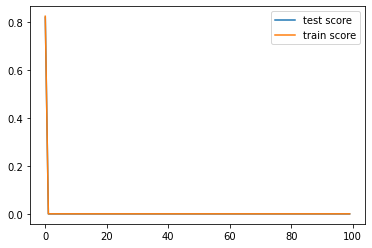

In [81]:
plt.plot(test_scores, label="test score")
plt.plot(train_scores, label ="train score")
plt.legend()

In [82]:
print(np.max(test_scores))
print(np.argmax(test_scores))

0.8193654826350258
0


- **Conclusion**
    - It's a **Generalised model, which performs well with test data**
        - It's **perfectly fit(neither underfit nor overfit)** model which performs equally with train and test data
        - Cross validations needs to be performed to check the consistency of the model with random unseen data
        - Completely unseen test data can also be used to check consistency of the model
    - Hyperparameter Tuning has not improved the performance of the model significantly
    - **Occam's razor** says, pick the simplest model that fits/explains the data well.
        - We can fall back Basic model considering simplicity and explainability

## Testing the assumptions of the Linear regression model 

### Check Assumption # 1 - No Multicollinearity should exist [Section A]

In [83]:
import statsmodels.api as sm
X_sm = sm.add_constant(X_train)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(y_train, X_sm).fit()

In [84]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     166.7
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          3.85e-139
Time:                        16:52:32   Log-Likelihood:                 566.71
No. Observations:                 398   AIC:                            -1109.
Df Residuals:                     386   BIC:                            -1062.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

- **Conclusion**
    - **Except "SOP_target_encoded" and "University Rating_target_encoded", TOEFL_score_category_target_encoded , CGPA_category_target_encoded , rest of the features are significant** as p-value is less than 0.05
    - Adjusted R-square is not poor 

## VIF

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
vif = pd.DataFrame()
X_t = X_train
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,15426.05
1,TOEFL Score,4567.43
2,GRE_TOEFL_score_ratio,2918.64
3,CGPA,1185.43
8,TOEFL_score_category_target_encoded,625.71
7,GRE_score_category_target_encoded,245.34
4,SOP_target_encoded,156.70
9,CGPA_category_target_encoded,150.25
6,University Rating_target_encoded,149.57
5,LOR _target_encoded,133.11


**Note : Vif values tends to be high/infinity when there is a perfect correlation between the variables**
- Any variable with a VIF of 5 or above is considered  correlated with other variables.
- Notice how there are 6 features which have multicollinearity in them,

#### But should we only consider those features which has VIF<5 ?
- No, We should step-by-step drop the features with the highest VIF and see how the model performs for each case.
- Since dropping all of those features will cause loss of high valued information necessary for prediction 

Lets Take our case for better understanding this:
- We see feature ```TOEFL Score```, ```GRE Score``` has $VIF = very high $, and we know when checking 'Chance of Admission' both TOEFL and GRE has the same meaning
- Hence dropping both of them will cause a critical information loss 
- Therefore we drop only one of the feature

In [87]:
# build model without all those correlated columns
X_train_new = X_train.drop(columns=['TOEFL Score'])
X_test_new = X_test.drop(columns=['TOEFL Score'])

In [88]:
X2_sm = sm.add_constant(X_train_new)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_model = sm.OLS(y_train, X2_sm).fit()

In [89]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     183.8
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          2.88e-140
Time:                        16:52:33   Log-Likelihood:                 566.67
No. Observations:                 398   AIC:                            -1111.
Df Residuals:                     387   BIC:                            -1067.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [90]:
vif = pd.DataFrame()
X_t = X_train_new
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,3528.42
2,CGPA,1179.24
1,GRE_TOEFL_score_ratio,825.43
7,TOEFL_score_category_target_encoded,541.19
6,GRE_score_category_target_encoded,194.55
3,SOP_target_encoded,155.88
8,CGPA_category_target_encoded,149.60
5,University Rating_target_encoded,149.54
4,LOR _target_encoded,133.10
9,Research,3.52


In [91]:
# build model without all those correlated columns
X_train_new = X_train_new.drop(columns=['CGPA'])
X_test_new = X_test_new.drop(columns=['CGPA'])

In [92]:
X2_sm = sm.add_constant(X_train_new)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_model = sm.OLS(y_train, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     159.5
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          1.67e-124
Time:                        16:52:33   Log-Likelihood:                 526.51
No. Observations:                 398   AIC:                            -1033.
Df Residuals:                     388   BIC:                            -993.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [93]:
vif = pd.DataFrame()
X_t = X_train_new
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,2436.74
1,GRE_TOEFL_score_ratio,768.04
6,TOEFL_score_category_target_encoded,534.17
5,GRE_score_category_target_encoded,193.85
2,SOP_target_encoded,152.08
4,University Rating_target_encoded,144.38
3,LOR _target_encoded,126.68
7,CGPA_category_target_encoded,118.68
8,Research,3.51


In [94]:
# build model without all those correlated columns
X_train_new = X_train_new.drop(columns=['SOP_target_encoded'])
X_test_new = X_test_new.drop(columns=['SOP_target_encoded'])

In [95]:
X2_sm = sm.add_constant(X_train_new)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_model = sm.OLS(y_train, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     177.0
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          1.44e-124
Time:                        16:52:33   Log-Likelihood:                 523.96
No. Observations:                 398   AIC:                            -1030.
Df Residuals:                     389   BIC:                            -994.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [96]:
vif = pd.DataFrame()
X_t = X_train_new
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,2310.56
1,GRE_TOEFL_score_ratio,734.59
5,TOEFL_score_category_target_encoded,530.37
4,GRE_score_category_target_encoded,192.46
3,University Rating_target_encoded,117.37
6,CGPA_category_target_encoded,117.02
2,LOR _target_encoded,114.58
7,Research,3.51


In [97]:
# build model without all those correlated columns
X_train_new = X_train_new.drop(columns=['GRE Score'])
X_test_new = X_test_new.drop(columns=['GRE Score'])

In [98]:
X2_sm = sm.add_constant(X_train_new)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_model = sm.OLS(y_train, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     165.1
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          1.86e-112
Time:                        16:52:33   Log-Likelihood:                 492.63
No. Observations:                 398   AIC:                            -969.3
Df Residuals:                     390   BIC:                            -937.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [99]:
vif = pd.DataFrame()
X_t = X_train_new
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,TOEFL_score_category_target_encoded,408.06
0,GRE_TOEFL_score_ratio,269.49
1,LOR _target_encoded,112.62
2,University Rating_target_encoded,112.36
5,CGPA_category_target_encoded,110.24
3,GRE_score_category_target_encoded,106.77
6,Research,3.51


In [100]:
# build model without all those correlated columns
X_train_new = X_train_new.drop(columns=['University Rating_target_encoded'])
X_test_new = X_test_new.drop(columns=['University Rating_target_encoded'])

In [101]:
X2_sm = sm.add_constant(X_train_new)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_model = sm.OLS(y_train, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     179.1
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          6.96e-109
Time:                        16:52:33   Log-Likelihood:                 481.49
No. Observations:                 398   AIC:                            -949.0
Df Residuals:                     391   BIC:                            -921.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [102]:
vif = pd.DataFrame()
X_t = X_train_new
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TOEFL_score_category_target_encoded,403.85
0,GRE_TOEFL_score_ratio,269.48
4,CGPA_category_target_encoded,110.21
2,GRE_score_category_target_encoded,93.52
1,LOR _target_encoded,92.20
5,Research,3.48


- **Conclusion**:
    - While removing Multi-collinearity we **lost almost all singnifant features such as "GRE Score", "TOEFL Score" etc**. Which **is not good**
    - We can **try selecting features which has low correlation among independent variables** . e.g. using cut off in pierson correlation coeffient 
        - e.g. can select either "GRE Score" or "TOEFL Score" .But **domain experts needs to be consulted**
    - If focus is **only prediction and no explainability** then model with high VIFs can still be considered 
    - Principle component analysis to combine features but considering  limited features available and Explainability of the model would be impacted
        - Again **domain experts should be consulted**

**NOTE: multicollinearity may not be a problem every time.**

The need to fix multicollinearity depends primarily on the below reasons:

- **Removing multicollinearity may be a good option**, When we **care more about how much each individual feature rather than a group of features affects the target variable**

### Check Assumption # 2 - The mean of residuals is nearly zero

In [103]:
residuals = y_test.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.0026613065326636454


- **Conclusion**:
    Mean of residuals are almost zero , satisfies Assumption # 2

### Check Assumption # 3 - Linearity

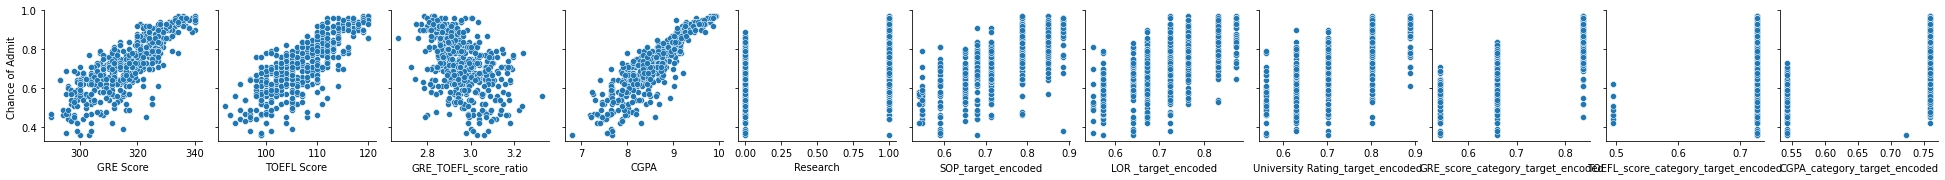

In [104]:
sns.pairplot(df, x_vars=['GRE Score','TOEFL Score','GRE_TOEFL_score_ratio','CGPA','Research','SOP_target_encoded','LOR _target_encoded','University Rating_target_encoded','GRE_score_category_target_encoded','TOEFL_score_category_target_encoded','CGPA_category_target_encoded'],y_vars=["Chance of Admit "]);

- **Conclusion**:
    - Only 'GRE Score','TOEFL Score','CGPA' shows linear relationship .
    - Rest of the features doesn't show linear relationship 

### Check Assumption # 4 - Heteroskedasticity should not exist

In [105]:
weights = basic_model.coef_
weights

array([[ 0.04625695, -0.02631735, -0.02647906,  0.0657157 ,  0.00514712,
         0.01717672,  0.00587455,  0.003775  , -0.00207737,  0.00311097,
         0.0105253 ]])

In [106]:
def predict(X, W):
  '''
  X : (n,d) it'a input matrix
  W : (d, 1) all the weights
  '''
  return np.dot(X,W.T)

In [107]:
Y_hat = predict(X_test_transformed,weights)
residuals = Y_hat - y_test

In [108]:
Y_hat = np.reshape(Y_hat, -1)
residuals = residuals.to_numpy()
residuals = np.reshape(residuals, -1)

Text(0.5, 1.0, 'Predicted values vs Residuals')

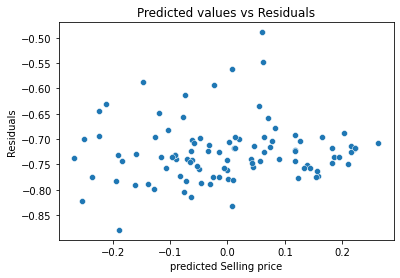

In [109]:
sns.scatterplot(Y_hat,residuals)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

- **Conclusion**:
    - **Heteroskedasticity exists**
    - There is **outliers present in the dataset**

### Check Assumption # 5 - Residuals should be normally distributed

Text(0.5, 1.0, 'Histogram of residuals')

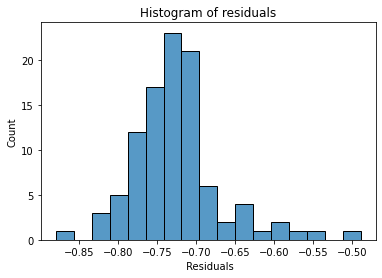

In [110]:
sns.histplot(residuals)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

#### QQplot 

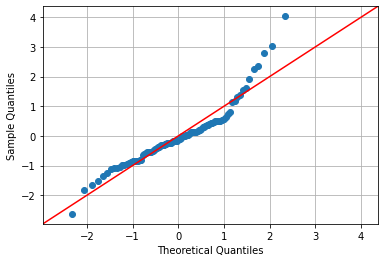

In [111]:
sm.qqplot(residuals, line ='45', fit=True)
plt.grid()

- **Conclusion**:
    - The error **distribution is not normal**, it means there are **outliers present in data**.
        - It means there are some observations where the error is very large. i.e. likelyhood of outliers is more.
        - As there is an outlier present, the line of best fit or regression line will get pulled towards it.
        - Error is difference between actual and predicted value.
        - The closer the regression line is to outlier, less the error. The goal is to get minimum squared error.
    - The assumption of **error being normally distributed is not being sastified**

### Check Assumption # 6 - No Auto-correlation should exists(time series)

- **Conclusion**:
    - Autocorrelation only plays role when there is somthing related to time.
    - As there is no time series data available we can't validate Auto-correlation assumption  

- **Conclusion on violation of assumptions**: 
    - In practice, we can build a linear regression if few assumptions are not met, but we've to be careful and look out for way model can break and fix it. 
    - In the end, what matters for us is model working in production / test data.

### Actionable Insights & Recommendations

#### Comments on significance of predictor variables

- **Significant variables that are important in predicting chance of admit (mentioned below in order of significance)**
    - LOR (1)
    - CGPA (2)
    - Research (3)
- **Strength of relationship** based on co-efficients of stats model at [SECTION A] 
    - LOR (1)
    - CGPA (2)
    - Research (3)
- **Type of relationship** the variables have
    - Linear relationship 

#### Comments on additional data sources for model improvement, model implementation in real world, potential business benefits from improving the model (These are key to differentiating a good and an excellent solution)

- Following Additional data needs to Analyzed for model improvements 
    - **More data points when there would be high chance of admission**
    - **Origin Country of applicant** (It would be useful to check significance of TOEFL score)
    - Work experience
- Model performance should be improved to 90 - 95 % as existing model has approx 20 % of error